# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
   ---------------------------------------- 0.0/19.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.0 MB 960.0 kB/s eta 0:00:20
   ---------------------------------------- 0.2/19.0 MB 1.6 MB/s eta 0:00:12
   - -------------------------------------- 0.6/19.0 MB 4.4 MB/s eta 0:00:05
   -- ------------------------------------- 1.3/19.0 MB 7.3 MB/s eta 0:00:03
   ------ --------------------------------- 3.0/19.0 MB 12.5 MB/s eta 0:00:02
   --------- ------------------------------ 4.5/19.0 MB 16.8 MB/s eta 0:00:01
   ------------ --------------------------- 6.1/19.0 MB 18.6 MB/s eta 0:00:01
   ----------------- ---------------------- 8.3/19.0 MB 22.0 MB/s eta 0:00:01
   --------------------- ------------------ 10.2/19.0 MB 24.2 MB/s eta 0:00:01
   -------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [5]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [6]:
df_data.shape

(962, 16)

In [7]:
df_data.describe()

,year
count,962.00
mean,"1,971.82"
std,33.81
min,"1,901.00"
25%,"1,948.00"
50%,"1,977.00"
75%,"2,001.00"
max,"2,020.00"


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [8]:
print(f"Any duplicates? {df_data.duplicated().values.any()}")

Any duplicates? False


### Check for NaN Values

In [9]:
df_data.isna().values.any()

np.True_

In [10]:
# See NaN values by column
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

Why are there so many NaN values for the birth date? And why are there so many missing values among the organisation columns?

Filtering on the NaN values in the birth date column we see that we get back a bunch of organisations, like the UN or the Red Cross.

In [11]:
col_subset = ["year", "category", "laureate_type", "birth_date", "full_name", "organization_name"]

df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


That makes sense. We also see that since the organisation's name is in the full_name column, the organisation_name column contains NaN.

In addition, when we look at for rows where the organization_name column has no value, we also see that many prizes went to people who were not affiliated with a university or research institute. This includes many of the Literature and Peace prize winners.

In [12]:
col_subset = ["year", "category", "laureate_type", "full_name", "organization_name"]

df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [13]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [14]:
sep_values = df_data.prize_share.str.split("/", expand=True)
numerator = pd.to_numeric(sep_values[0])
denom = pd.to_numeric(sep_values[1])
df_data["share_pct"] = numerator / denom

In [15]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Basic Challenges

## Challenge 1: Come up with 3 Questions

A big part of data science is coming up with questions that you'd like to explore. This is the most difficult aspect to teach in a tutorial because it's completely open-ended and requires some creativity. Often times you will be asking questions of the data, that it actually cannot answer - and that's ok. That's all part of the process of discovery.

Pause here for a moment and think about the kind of data you saw in the columns. Write down at least 3 questions that you'd like to explore as part of this analysis. For example, your question might go like: "What percentage of the Nobel laureates were women?" or "How many prizes were given out in each category". Practice coming up with a few of your own questions.

In the upcoming lessons, you might find that we will write the code to answer some of your questions. And if not, your questions make for a great exercise to take this analysis even further.



1. Are certain categories more likely to be awarded to an organization or an individual? 
2. Does sex have any coorelation with prize category or laureate type?
3. Is there any coorelation between the prize winner's birthday country and the category of the award? Are some countries more likely to recognize an organization or an individual?

In [17]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


## Challenge 2: Plotly Donut Chart

### Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [19]:
%pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.20.0-cp311-none-win_amd64.whl.metadata (4.2 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.20.0-py3-none-any.whl (23 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached attrs-24.2.0-py3-none-any.whl (63 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
Using cached rpds_py-0.20.0-cp311-none-win_amd64.whl (213 kB)
Note: you ma


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
genders = df_data.sex.value_counts()

In [22]:
fig = px.pie(
    labels=genders.index,
    values=genders.values,
    title="Percentage of Male v Female Winners",
    names=genders.index,
    hole=0.4
)

fig.update_traces(textposition="inside", textfont_size=15, textinfo="percent")

fig.show()

## Challenge 3: First 3 Women

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [23]:
df_data[df_data.sex == "Female"].sort_values("year", ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


## Challenge 4: Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [24]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f"There are {multiple_winners.full_name.nunique()} winners who were awarded the prize more than once.")

There are 6 winners who were awarded the prize more than once.


In [25]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


Only 4 of the repeat laureates were individuals.

We see that Marie Curie actually got the Nobel prize twice - once in physics and once in chemistry. Linus Carl Pauling got it first in chemistry and later for peace given his work in promoting nuclear disarmament. Also, the International Red Cross was awarded the Peace prize a total of 3 times. The first two times were both during the devastating World Wars.

## Challenge 5: Plotly Bar Chart

### Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [26]:
# Find unique categories in column
df_data.category.nunique()

6

In [27]:
prizes_per_category = df_data.category.value_counts()
v_bar = px.bar(
    x = prizes_per_category.index,
    y = prizes_per_category.values,
    color = prizes_per_category.values,
    title = "Number of Prizes Awarded Per Category"
)

v_bar.update_layout(
    xaxis_title='Nobel Prize Category',
    coloraxis_showscale=False,
    yaxis_title='Number of Prizes'
)

v_bar.show()

## Challenge 6: The Economics Prize

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

The chart above begs the question: "Why are there so few prizes in the field of economics?". Looking at the first couple of winners in the economics category, we have our answer:

In [28]:
df_data[df_data.category == 'Economics'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


The economics prize is much newer. It was first awarded in 1969, compared to 1901 for physics.



## Challenge 7: Plotly Stacked Bar Chart

### Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

We already saw that overall, only 6.2% of Nobel prize winners were female. Does this vary by category?

In [30]:
cat_gender = df_data.groupby(
    ['category', 'sex'], 
    as_index=False
    ).agg(
        {
            'prize': pd.Series.count
            }
            )

cat_gender.sort_values('prize', ascending=False, inplace=True)


We can combine .groupby() and .agg() with the .count() function. This way we can count the number of men and women by prize category.

In [31]:
cat_gender

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


We can then use .color the parameter in the .bar() function to mark the number of men and women on the chart:

In [32]:
v_bar_split = px.bar(
    x=cat_gender.category,
    y=cat_gender.prize,
    color=cat_gender.sex,
    title='Number of Prizes Awarded Per Category by Sex'
)

v_bar_split.update_layout(
    xaxis_title='Nobel Prize Category',
    yaxis_title='Number of Prizes'
)

v_bar_split.show()

We see that overall the imbalance is pretty large with physics, economics, and chemistry. Women are somewhat more represented in categories of Medicine, Literature and Peace. Splitting bar charts like this is an incredibly powerful way to show a more granular picture.

# Matplotlib Timeline Challenges

## Challenge 1: Scatter & Line Plot

### Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [34]:
# Get number of prizes awarded by year
prizes_by_year = df_data.groupby(by='year').count().prize

This just involves grouping the data so that we can count the number of entries per year. To calculate the 5-year moving average we use .rolling() and .mean() like we did with the Google Trend data.

In [35]:
moving_avg = prizes_by_year.rolling(window=5).mean()

Now we can create a Matplotlib chart that superimposes the two:

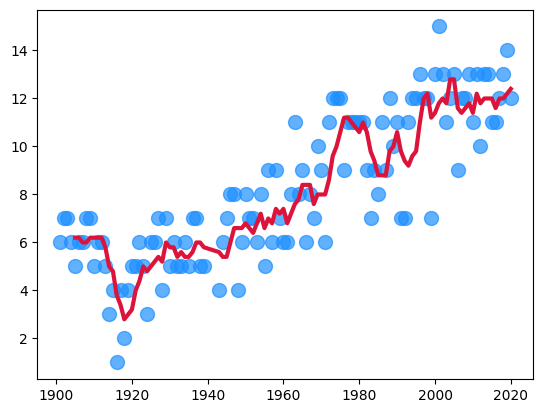

In [36]:
plt.scatter(
    x=prizes_by_year.index,
    y=prizes_by_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=100
)

plt.plot(
    prizes_by_year.index,
    moving_avg.values,
    c='crimson',
    linewidth=3,
)

plt.show()

With the help of a little styling, this chart could look better. To create 5-year tick marks on the x-axis, we generate an array using NumPy:

In [37]:
np.arange(1900, 2021, step=5)

array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

Then we tap into functions like the .figure(), the .title(), the .xticks(), and .yticks() to fine-tune the chart.

In addition, we will shortly be adding a second y-axis, so we can use an Axes object to draw our scatter and line plots.

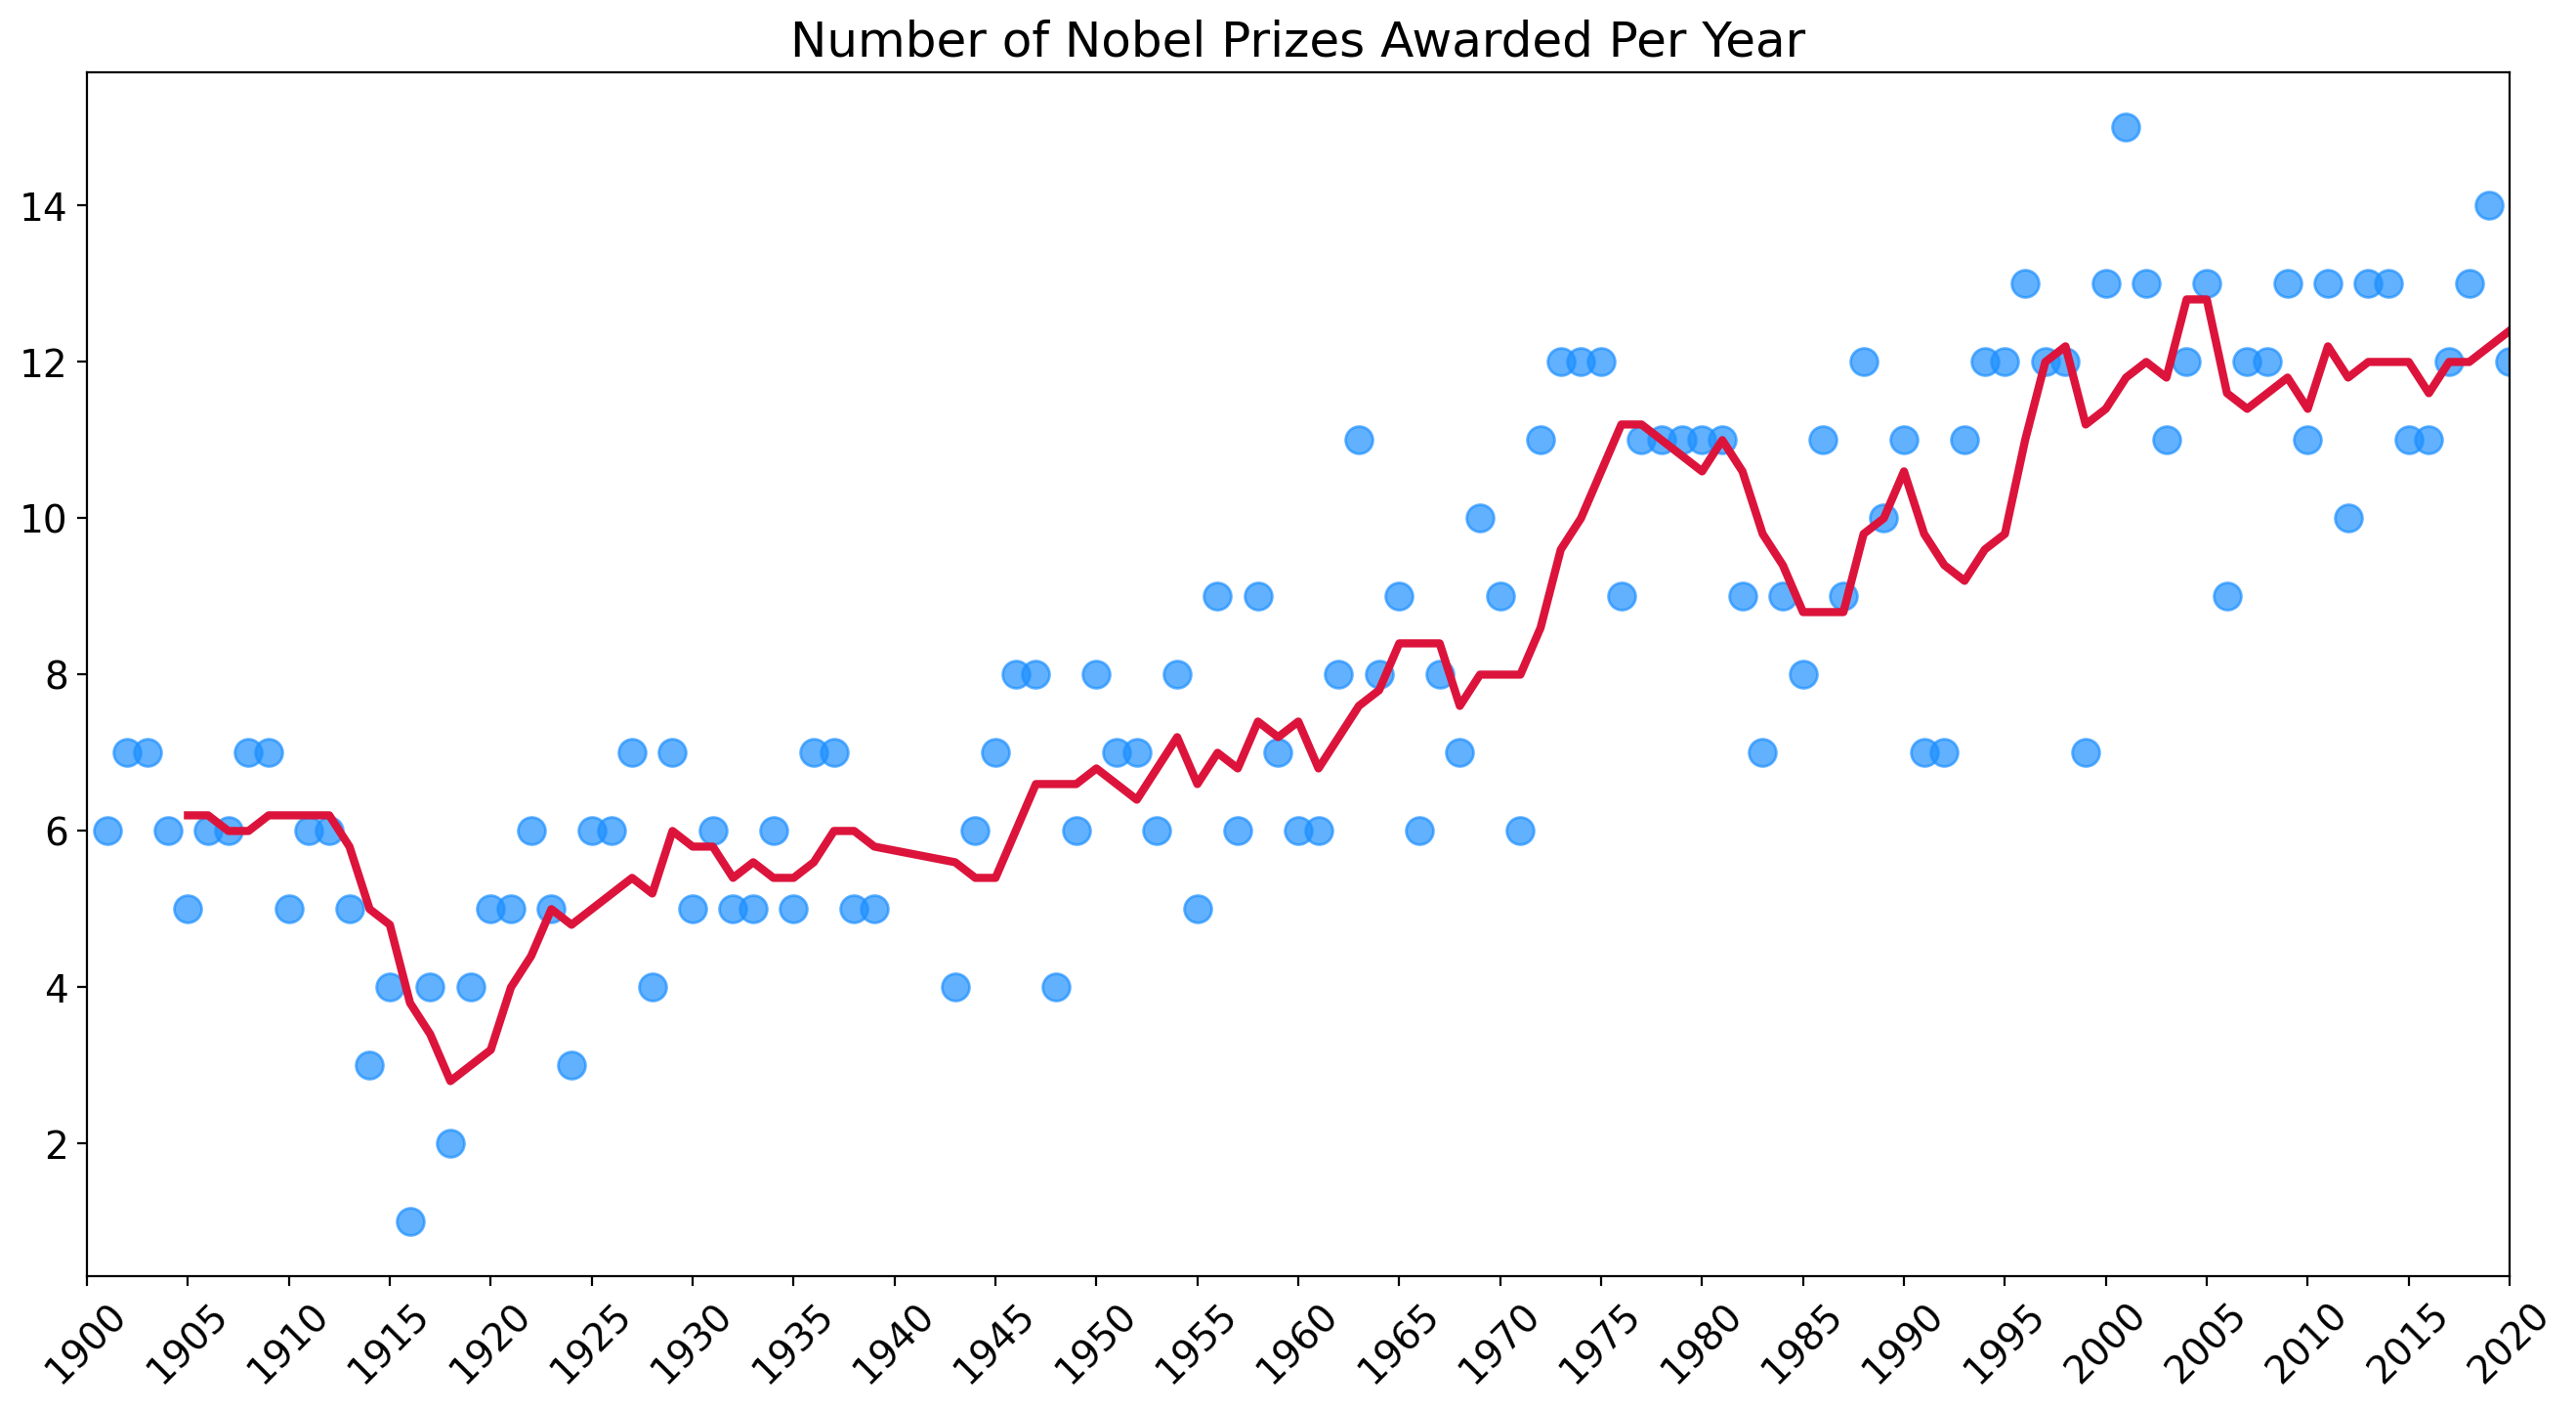

In [38]:
plt.figure(figsize=(16,8), dpi=200)

plt.title('Number of Nobel Prizes Awarded Per Year', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(
    ticks=np.arange(1900, 2021, step=5),
    fontsize=14,
    rotation=45
)

ax=plt.gca() # Get current axis
ax.set_xlim(1900, 2020)

ax.scatter(
    x=prizes_by_year.index,
    y=prizes_by_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=100
)

ax.plot(
    prizes_by_year.index,
    moving_avg.values,
    c='crimson',
    linewidth=3
)

plt.show()

## Challenge 2: Adding Another Line to Chart

### Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

Now we can work out the rolling average of the percentage share of the prize. If more prizes are given out, perhaps it is because the prize is split between more people.

In [39]:
yearly_avg_share = df_data.groupby(by='year').agg(
    {
        'share_pct': pd.Series.mean
        }
        )

share_moving_avg = yearly_avg_share.rolling(window=5).mean()

If more people get the prize, then the average share should go down, right? 

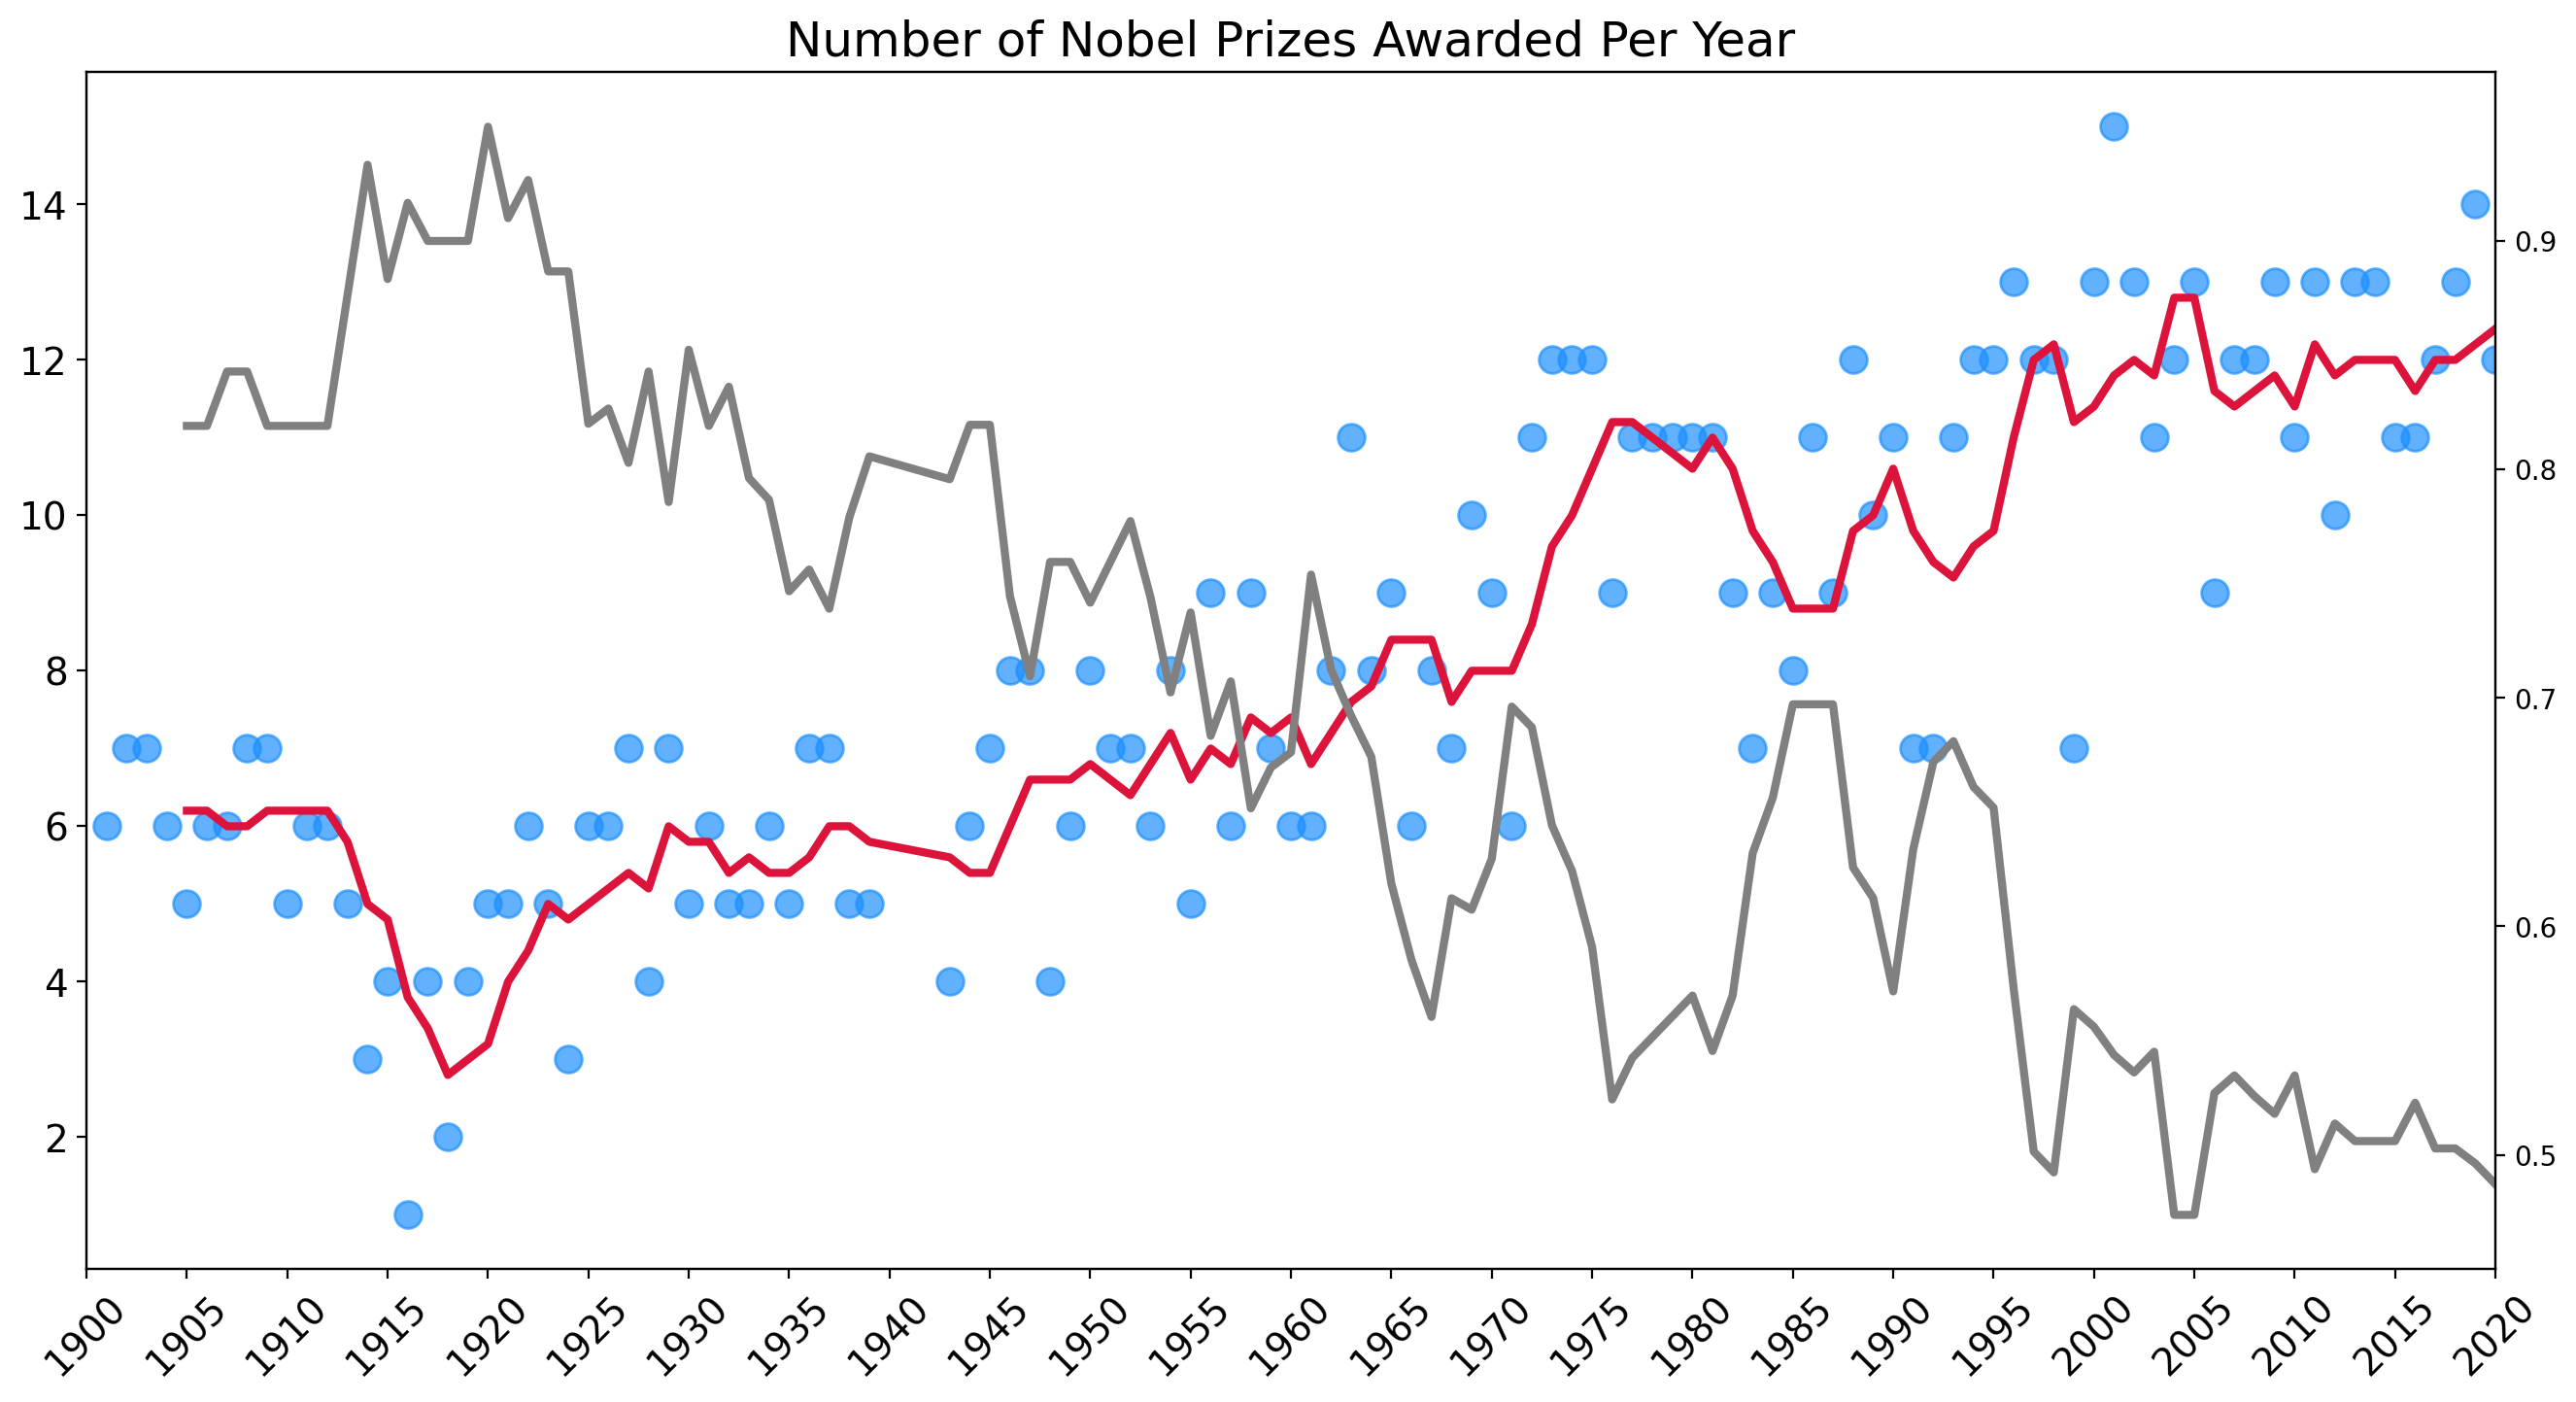

In [40]:
plt.figure(figsize=(16,8), dpi=200)

plt.title('Number of Nobel Prizes Awarded Per Year', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(
    ticks=np.arange(1900, 2021, step=5),
    fontsize=14,
    rotation=45
)

# Add in additional axis
ax1=plt.gca()
ax2=ax1.twinx() # Create second y axis
ax1.set_xlim(1900, 2020)

ax1.scatter(
    x=prizes_by_year.index,
    y=prizes_by_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=100
)

ax1.plot(
    prizes_by_year.index,
    moving_avg.values,
    c='crimson',
    linewidth=3
)

# Add prize share plot on new axis
ax2.plot(
    prizes_by_year.index,
    share_moving_avg.values,
    c='grey',
    linewidth=3
)

plt.show()

To see the relationship between the number of prizes and the laureate share even more clearly we can invert the second y-axis.

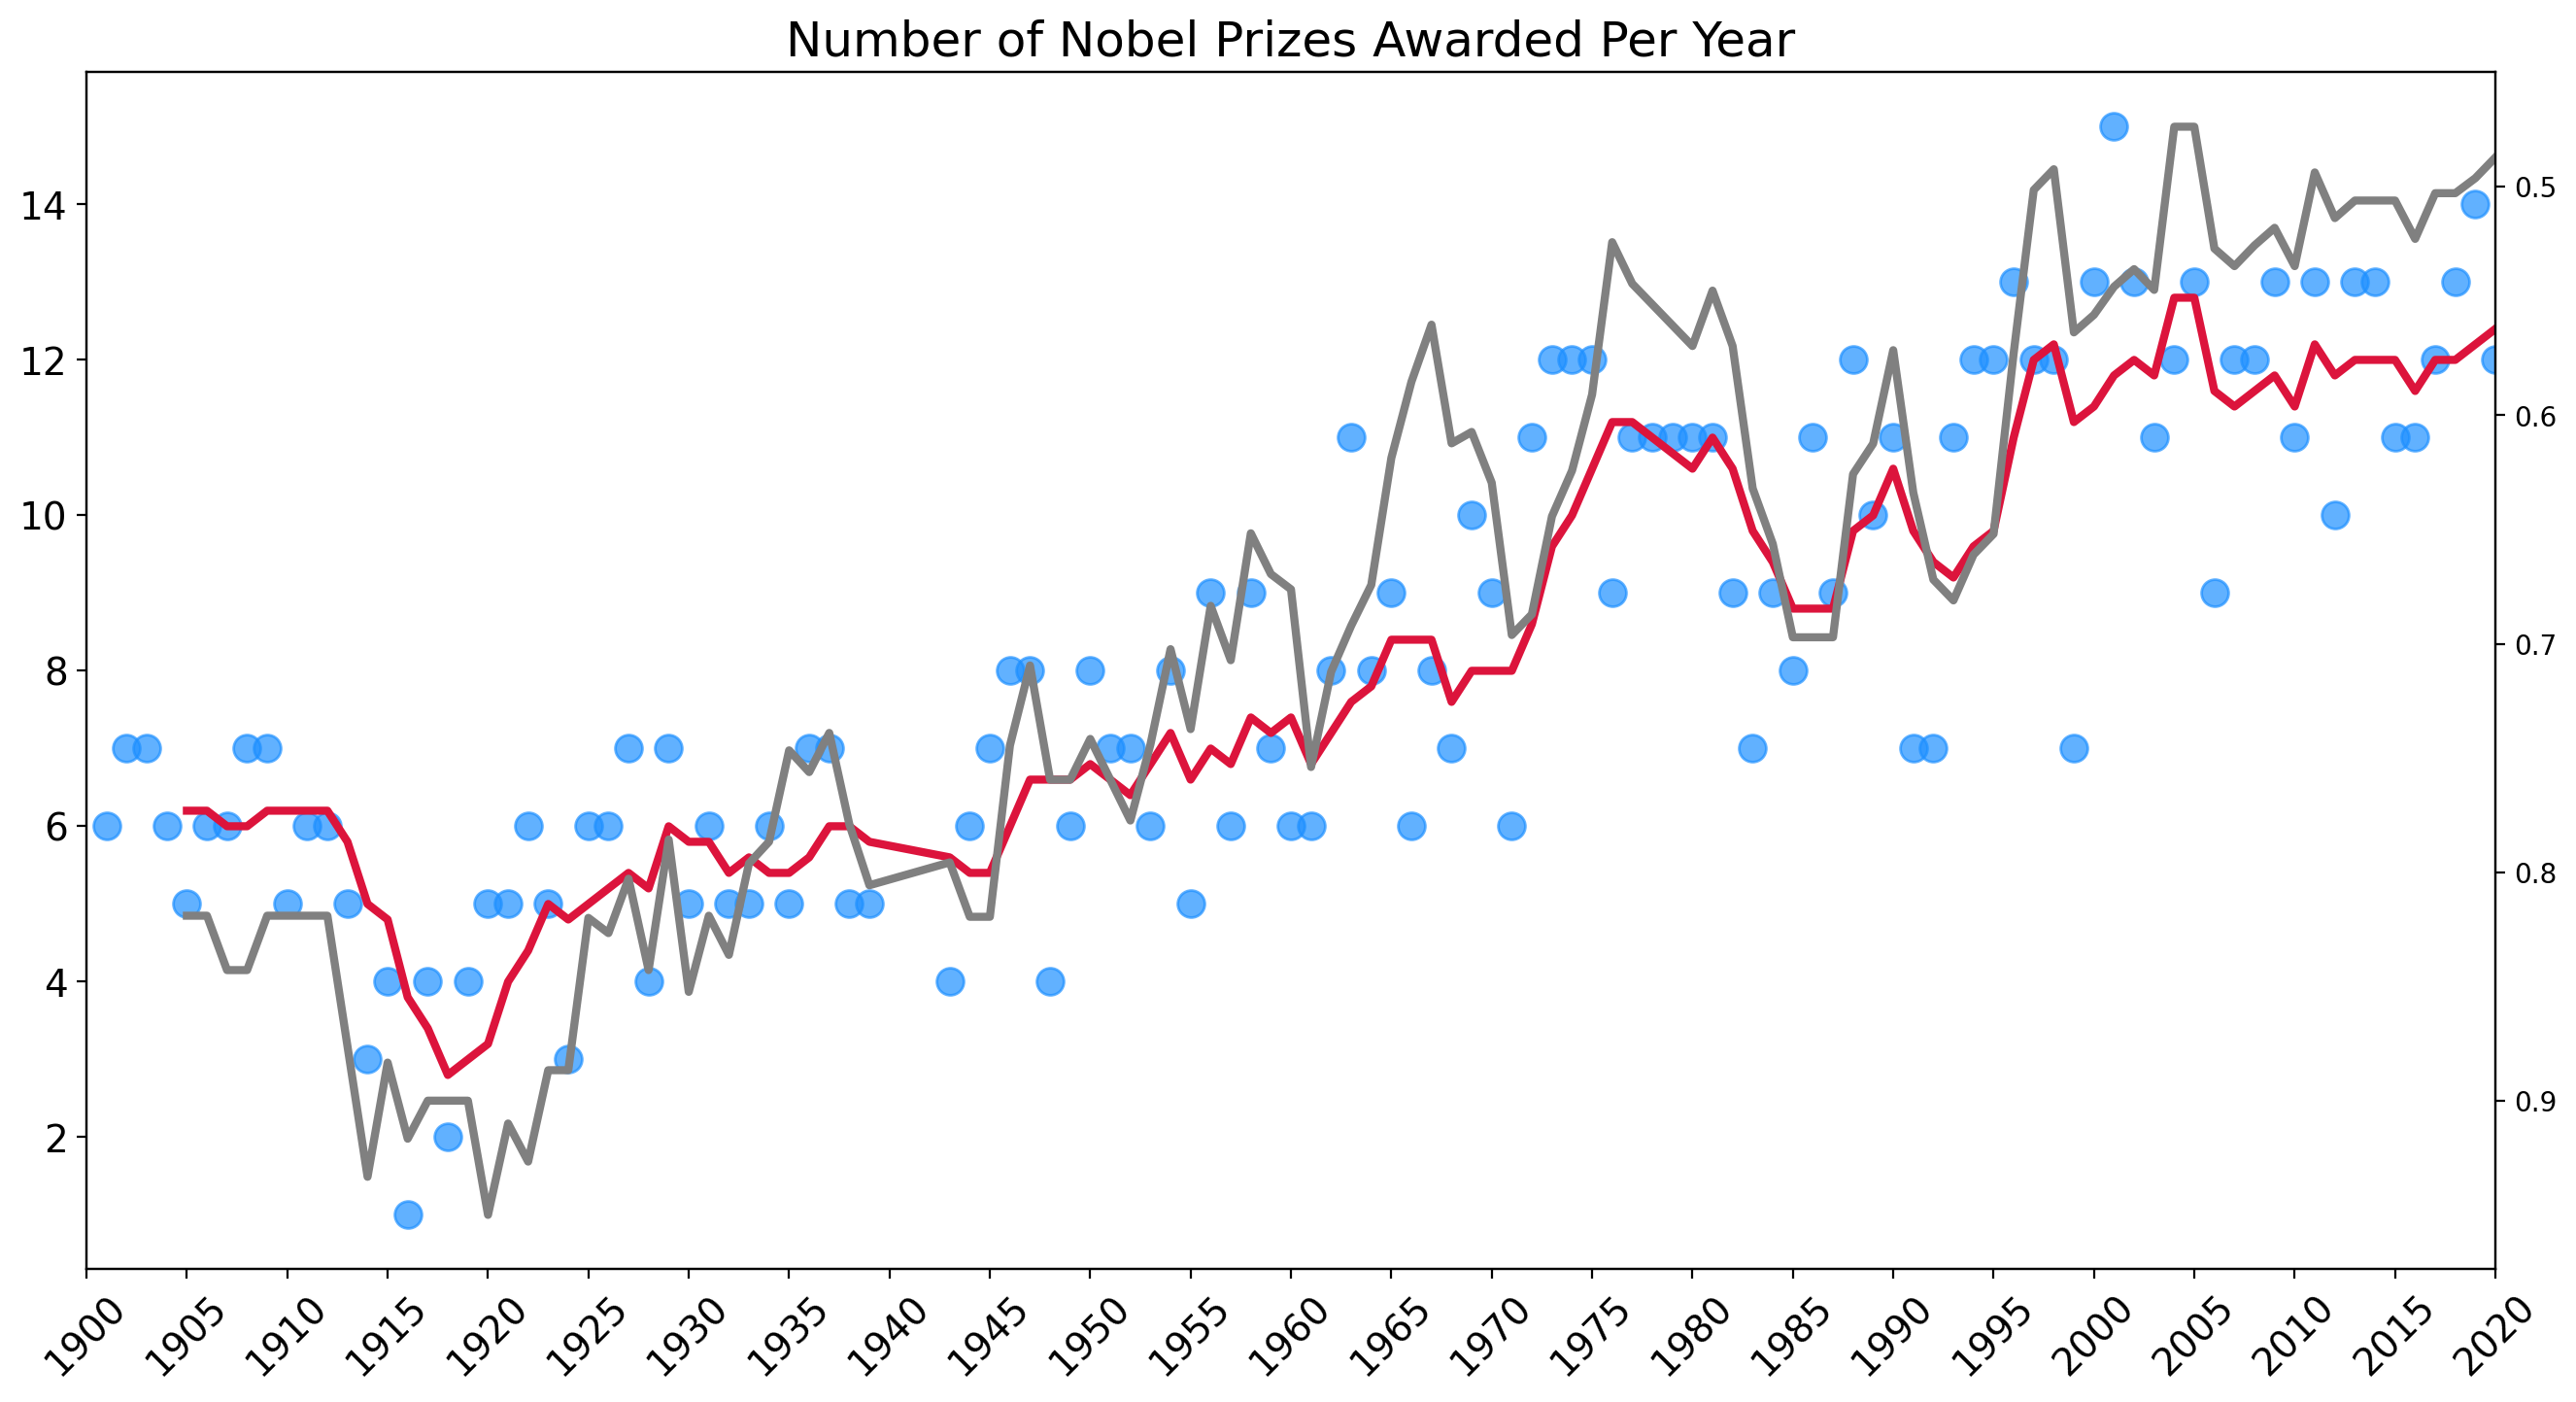

In [41]:
plt.figure(figsize=(16,8), dpi=200)

plt.title('Number of Nobel Prizes Awarded Per Year', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(
    ticks=np.arange(1900, 2021, step=5),
    fontsize=14,
    rotation=45
)

# Add in additional axis
ax1=plt.gca()
ax2=ax1.twinx() # Create second y axis
ax1.set_xlim(1900, 2020)

# Invert second y axis
ax2.invert_yaxis()

ax1.scatter(
    x=prizes_by_year.index,
    y=prizes_by_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=100
)

ax1.plot(
    prizes_by_year.index,
    moving_avg.values,
    c='crimson',
    linewidth=3
)

# Add prize share plot on new axis
ax2.plot(
    prizes_by_year.index,
    share_moving_avg.values,
    c='grey',
    linewidth=3
)

plt.show()

What do we see on the chart? Well, there is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars. Note that instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.

# Plotly - Country

## Challenge 1: Bar Chart - Pandas

### Top 20 Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

Looking at our DataFrame there are actually 3 different columns to choose from for creating this ranking: birth_country, birth_country_current or organization_country. However, they each have certain problems and limitations.

If you look at the entries in the birth country, you'll see that some countries no longer exist! These include the Soviet Union or Czechoslovakia for example. Hence, using birth_country_current is better, since it has the country name which controls the city where the laureate was born. Now, notice that this does not determine the laureates' nationality since some globetrotting folks gave birth to their future Nobel laureate children while abroad. Also, people's nationalities can change as they emigrate and acquire different citizenship or get married and change citizenship. What this boils down to is that we will have to be clear about the assumptions that we will make in the upcoming analysis.

We can create the list of the top 20 countries like this:

In [42]:
top_countries = df_data.groupby(
    ['birth_country_current'],
    as_index=False
    ).agg(
        {'prize': pd.Series.count}
    )

top_countries.sort_values(by='prize', inplace=True)

top20 = top_countries[-20:]

Note that the ranking here determines how our bar chart will be displayed.

In [43]:
h_bar = px.bar(
    x=top20.prize,
    y=top20.birth_country_current,
    orientation='h',
    color=top20.prize,
    color_continuous_scale='Viridis',
    title='Top 20 Countries by Number of Prizes'
)

h_bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Country',
    coloraxis_showscale=False
)

h_bar.show()

The United States has a massive number of prizes by this measure. The UK and Germany are in second and third place respectively.

## Challenge 2: Choropleth Map 

### Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


To show the above ranking on a colour coded map, we need to make use of the ISO codes.

In [45]:
df_countries = df_data.groupby(
    ['birth_country_current', 'ISO'],
    as_index=False
).agg(
    {
        'prize': pd.Series.count
    }
)

df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
63,Slovakia,SVK,1
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


This means we can use the ISO country codes for the locations parameter on the choropleth.

In [46]:
world_map = px.choropleth(
    df_countries,
    locations='ISO',
    color='prize',
    hover_name='birth_country_current',
    color_continuous_scale=px.colors.sequential.matter
)

world_map.update_layout(coloraxis_showscale=True)

world_map.show()

## Challenge 3: Stacked Bar - Pandas 

### In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


Preparing our data to show the breakdown by category and country is challenging. We'll take a two-step approach here. First we count the prizes by category in each country:

In [47]:
cat_country = df_data.groupby(
    ['birth_country_current', 'category'],
    as_index=False
).agg(
    {
        'prize': pd.Series.count
    }
)

cat_country.sort_values(by='prize', ascending=False, inplace=True)

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-20_15-39-34-67274118d7ced9c4bf5a8f81c3f667f1.png'>

Next, we can merge the DataFrame above with the top20_countries DataFrame that we created previously. That way we get the total number of prizes in a single column too. This is important since we want to control the order for our bar chart.

In [48]:
merged_df = pd.merge(
    cat_country,
    top20,
    on='birth_country_current'
)

# Change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']

merged_df.sort_values(by='total_prize', inplace=True)

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-20_15-42-03-e31d94a8366dcf1b7c91618eb9e234f9.png'>

Now we can create our bar chart again. This time we use the color parameter based on the category.

In [49]:
bar_cat_country = px.bar(
    x=merged_df.cat_prize,
    y=merged_df.birth_country_current,
    color=merged_df.category,
    orientation='h',
    title='Top 20 Countries by Number of Prizes & Category'
)

bar_cat_country.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Country'
    )

bar_cat_country.show()


Splitting the country bar chart by category allows us to get a very granular look at the data and answer a whole bunch of questions. For example, we see is that the US has won an incredible proportion of the prizes in the field of Economics. In comparison, Japan and Germany have won very few or no economics prize at all. Also, the US has more prizes in physics or medicine alone than all of France's prizes combined. On the chart, we also see that Germany won more prizes in physics than the UK and that France has won more prizes in peace and literature than Germany, even though Germany has been awarded a higher total number of prizes than France.

## Challenge 4: Line Chart - Pandas

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

To see how the prize was awarded over time. To do that, we can count the number of prizes by country by year.

In [50]:
prize_by_year = df_data.groupby(
    ['birth_country_current', 'year'], 
    as_index=False
    ).count()


prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

Then we can create a series that has the cumulative sum for the number of prizes won.

In [51]:
cumulative_prizes = prize_by_year.groupby(
    ['birth_country_current','year']
    ).sum().groupby(level=[0]).cumsum()
    
cumulative_prizes.reset_index(inplace=True) 

Using this, we can create a chart, using the current birth country as the color:

In [52]:
line = px.line(
    cumulative_prizes,
    x='year',
    y='prize',
    color='birth_country_current',
    hover_name='birth_country_current'
)

line.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Prizes'
)

line.show()

What we see is that the United States really started to take off after the Second World War which decimated Europe. Prior to that, the Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too. Perhaps this reflects a little bit of home bias? 😊



All this analysis of different countries makes me curious about where the actual research is happening. Where are the cities and organisations located where people actually make discoveries? 

# Plotly - Region & Organization

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 
